In [1]:
import pandas as pd
import numpy as np



In [2]:
data = pd.read_csv("diabetes.csv")  # Reading the Data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#replacing zeros values with the mean of  the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

X= data.drop(columns=['Outcome'])
Y = data['Outcome']

In [5]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size =0.25,random_state = 355)

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)
LogisticRegression()


LogisticRegression()

In [8]:
y_pred = log_reg.predict(x_test)


In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [12]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [13]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]


In [14]:
#Breaking down the formula for accuracy
Accuracy = (true_positive + true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7552083333333334

In [15]:
#Precision
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [16]:
#Recall
Recall =true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [23]:
#F1Score
f1_score = (2*Precision*Recall)/(Precision+Recall)
f1_score

0.8239700374531835

In [24]:
#Area Under Curve
auc = roc_auc_score(y_test,y_pred)
auc

0.7011940298507463

In [22]:
#True Positive rate
# TPR = true_positive/(true_positive+false_negative)
# FPR = false_positive/(false_positive + true_negative)
# FPR


0.7746478873239436

In [25]:
fpr,tpr ,thresholds = roc_curve(y_test,y_pred)
fpr, tpr, thresholds



(array([0.  , 0.12, 1.  ]),
 array([0.        , 0.52238806, 1.        ]),
 array([2, 1, 0], dtype=int64))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


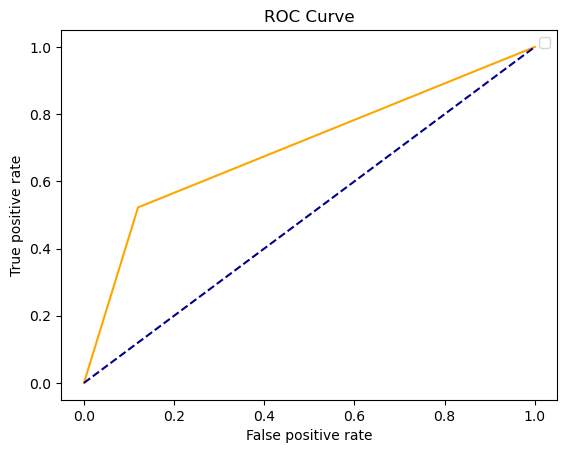

In [27]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],color='darkblue',linestyle ='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")
plt.legend()
plt.show()